# 1 . Data Exploration and Preprocessing

In [5]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv(r"D:\Assignments Data Science ExcelR\blogs.csv")

In [4]:
# Display the first few rows of the dataframe
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Newsgroups: sci.crypt\nPath: cantaloupe.srv.cs...,sci.space
freq,1,100


In [8]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [9]:
df['Labels'].value_counts()

sci.space                   100
sci.electronics             100
talk.religion.misc          100
talk.politics.misc          100
soc.religion.christian      100
comp.sys.mac.hardware       100
talk.politics.guns          100
comp.sys.ibm.pc.hardware    100
rec.autos                   100
sci.crypt                   100
rec.sport.baseball          100
misc.forsale                100
sci.med                     100
comp.graphics               100
comp.os.ms-windows.misc     100
rec.motorcycles             100
comp.windows.x              100
rec.sport.hockey            100
alt.atheism                 100
talk.politics.mideast       100
Name: Labels, dtype: int64

Data Preprocessing

In [10]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Download stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PRAPANJ K
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Define a function to clean the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [13]:
# Apply the preprocessing function to the 'Data' column
df['Data'] = df['Data'].apply(preprocess_text)

In [14]:
# Display the first few rows of the preprocessed data
print(df.head())

                                                Data       Labels
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism


Feature Extraction using TF-IDF

In [15]:
# Define the TF-IDF vectorizer
tfidf = TfidfVectorizer()

In [16]:
# Fit and transform the 'Data' column
X = tfidf.fit_transform(df['Data'])


In [17]:
# Display the shape of the TF-IDF matrix
print(X.shape)


(2000, 56435)


In [18]:
# Get the labels
y = df['Labels']

# 2. Naive Bayes Model for Text Classification

Split the Data into Training and Test Sets


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Display the shape of the training and test sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (1600, 56435), (1600,)
Test set: (400, 56435), (400,)


Implement a Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
# Instantiate the Naive Bayes classifier
nb_classifier = MultinomialNB()

In [24]:
# Train the model on the training set
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

Evaluate the Model

In [26]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.82


In [28]:
# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      0

# 3. Sentiment Analysis

In [29]:
#Install Necessary Libraries

In [30]:
!pip install nltk

In [31]:
!pip install vaderSentiment

In [32]:
#Import Libraries and Load VADER

In [33]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [34]:
# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\PRAPANJ K
[nltk_data]     M\AppData\Roaming\nltk_data...


True

In [35]:
# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

In [36]:
#Perform Sentiment Analysis on Blog Posts

In [37]:
# Define a function to classify sentiment
def classify_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [38]:
# Apply the function to the 'Data' column to get sentiment for each blog post
df['Sentiment'] = df['Data'].apply(classify_sentiment)

In [39]:
# Display the first few rows of the dataframe with sentiment
print(df.head())

                                                Data       Labels Sentiment
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  Negative
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism  Positive
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism  Negative
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  Negative
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism  Positive


In [40]:
#Examine the Distribution of Sentiments Across Different Categories

In [41]:
# Group by category and sentiment to get the count
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)


In [42]:
# Display the distribution
print(sentiment_distribution)

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   40.0      1.0      59.0
comp.graphics                 10.0      3.0      87.0
comp.os.ms-windows.misc       21.0      2.0      77.0
comp.sys.ibm.pc.hardware      17.0      3.0      80.0
comp.sys.mac.hardware         18.0      4.0      78.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0     10.0      83.0
rec.autos                     26.0      2.0      72.0
rec.motorcycles               32.0      1.0      67.0
rec.sport.baseball            26.0      3.0      71.0
rec.sport.hockey              25.0      3.0      72.0
sci.crypt                     24.0      1.0      75.0
sci.electronics               13.0      5.0      82.0
sci.med                       24.0      3.0      73.0
sci.space                     27.0      5.0      68.0
soc.religion.christian        25.0      1.0      74.0
talk.politics.guns          

In [43]:
# Summary of the distribution of sentiments
print("Distribution of Sentiments:")
print(sentiment_distribution.sum(axis=0))

Distribution of Sentiments:
Sentiment
Negative     574.0
Neutral       58.0
Positive    1368.0
dtype: float64


In [44]:
#Visualize the Distribution of Sentiments (Optional)

In [45]:
import matplotlib.pyplot as plt

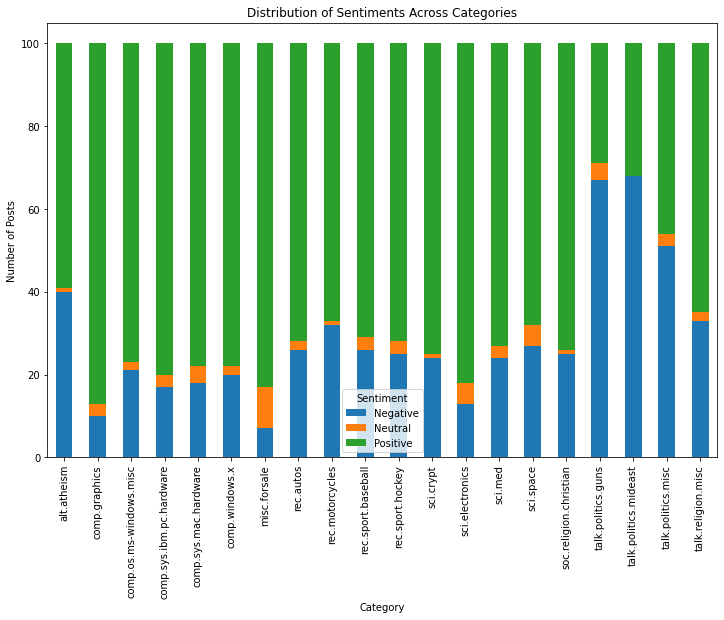

In [46]:
# Plot the distribution of sentiments across categories
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Sentiments Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.show()

# 4. Evaluation

In [47]:
#Evaluate the Performance of the Naive Bayes Classifier

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8200


In [50]:
# Display the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      

In [51]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[16  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 0 15  0  0  0  0  1  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  1 19  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  1 19  0  0  0  0  0  0  0  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  3  0  0  0 20  0  0  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  0  1  0 11  1  1  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1 14  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  1  0  0 13  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  1 15  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  2  0  0  0  0 18  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  

In [52]:
#Discuss the Performance of the Model

In [53]:
# Analysis of the performance
print("Model Performance Analysis:")
print(f"Accuracy: {accuracy:.4f}")
print("The classification report shows the precision, recall, and F1-score for each category. Here is a brief discussion:")


Model Performance Analysis:
Accuracy: 0.8200
The classification report shows the precision, recall, and F1-score for each category. Here is a brief discussion:


In [54]:
# Convert the classification report to a dictionary for detailed analysis
from sklearn.metrics import classification_report
import pandas as pd

In [55]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()


In [56]:
print(report_df)

                          precision    recall  f1-score  support
alt.atheism                0.516129  0.888889  0.653061    18.00
comp.graphics              0.625000  0.833333  0.714286    18.00
comp.os.ms-windows.misc    0.950000  0.863636  0.904762    22.00
comp.sys.ibm.pc.hardware   0.950000  0.760000  0.844444    25.00
comp.sys.mac.hardware      0.869565  0.952381  0.909091    21.00
comp.windows.x             1.000000  0.800000  0.888889    25.00
misc.forsale               0.916667  0.611111  0.733333    18.00
rec.autos                  0.888889  0.888889  0.888889    18.00
rec.motorcycles            0.875000  0.875000  0.875000    16.00
rec.sport.baseball         0.800000  0.888889  0.842105    18.00
rec.sport.hockey           0.833333  1.000000  0.909091    15.00
sci.crypt                  0.818182  0.947368  0.878049    19.00
sci.electronics            0.684211  0.812500  0.742857    16.00
sci.med                    0.937500  0.882353  0.909091    17.00
sci.space                

In [57]:
# Discuss any potential challenges
print("Challenges Encountered:")
print("- Imbalanced classes: If certain categories have fewer samples, the model might perform worse on those.")
print("- Text preprocessing: The quality of preprocessing steps (like removing stopwords, tokenization) directly affects model performance.")
print("- Feature extraction: TF-IDF captures term importance well, but might miss some context that could be useful for classification.")

Challenges Encountered:
- Imbalanced classes: If certain categories have fewer samples, the model might perform worse on those.
- Text preprocessing: The quality of preprocessing steps (like removing stopwords, tokenization) directly affects model performance.
- Feature extraction: TF-IDF captures term importance well, but might miss some context that could be useful for classification.


In [58]:
#Reflect on the Sentiment Analysis Results

In [59]:
# Sentiment distribution summary
sentiment_summary = df['Sentiment'].value_counts()
print("Sentiment Summary:\n", sentiment_summary)

Sentiment Summary:
 Positive    1368
Negative     574
Neutral       58
Name: Sentiment, dtype: int64


In [60]:
print("Reflection on Sentiment Analysis Results:")
print("The sentiment analysis revealed the overall tone of the blog posts. Here is a brief discussion:")
print(f"- Positive posts: {sentiment_summary['Positive']} posts.")
print(f"- Negative posts: {sentiment_summary['Negative']} posts.")
print(f"- Neutral posts: {sentiment_summary['Neutral']} posts.")
print("Implications:")
print("- A high number of positive posts might indicate a generally optimistic tone in the blog content.")
print("- A high number of negative posts might suggest that the blog often discusses problems or issues.")
print("- Neutral posts indicate objective or factual content, without strong sentiment.")

Reflection on Sentiment Analysis Results:
The sentiment analysis revealed the overall tone of the blog posts. Here is a brief discussion:
- Positive posts: 1368 posts.
- Negative posts: 574 posts.
- Neutral posts: 58 posts.
Implications:
- A high number of positive posts might indicate a generally optimistic tone in the blog content.
- A high number of negative posts might suggest that the blog often discusses problems or issues.
- Neutral posts indicate objective or factual content, without strong sentiment.
